In [1]:
import os
import sys
import numpy             as np
import pylab             as pl
import matplotlib.pyplot as plt
import matplotlib        as mpl

In [2]:
sys.path.append('{}'.format(os.environ['HOME']))
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [3]:
os.environ['GOLD_DIR']    = '/cosma5/data/durham/{}/GAMA4/'.format(os.environ['USER'])
os.environ['RANDOMS_DIR'] = '/cosma5/data/durham/{}/GAMA4/randoms/'.format(os.environ['USER'])

In [4]:
from findfile import findfile, gather_cat, fetch_fields
from vmaxer   import vmaxer_rand
from volfracs import volfracs

In [5]:
dryrun = False
survey = 'gama'
prefix = 'randoms_ddp1'

In [6]:
fields = fetch_fields(survey)

In [7]:
rpaths = [findfile(ftype='randoms_bd_ddp_n8', dryrun=dryrun, field=ff, survey=survey, prefix=prefix) for ff in fields]
rpaths

['/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G9_0.fits',
 '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G12_0.fits',
 '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G15_0.fits']

In [8]:
rand   = vmaxer_rand(survey=survey, ftype='randoms_bd_ddp_n8', dryrun=dryrun, prefix=prefix)

FILLFACTOR has fraction 0.29869027788271385 to be updated
FILLFACTOR has fraction 0.7013097221172861 not set.
FILLFACTOR has fraction 0.0 now set.
Unique tiers: [0 1 2 3 4 5 6 7 8]
DDP1 randoms: 0.019032 < z < 0.271510
IN_D8LUMFN 0.7013097221172861

DDP1_d0_VOLFRAC OF 0.258530 added.
DDP1_d0_TIERMED d8 OF -0.892817 added.
DDP1_d0_ZEROPOINT_VOLFRAC OF 0.2011061239 added.
DDP1_d0_ZEROPOINT_TIERMED d8 OF -0.850535 added.

DDP1_d1_VOLFRAC OF 0.103982 added.
DDP1_d1_TIERMED d8 OF -0.655901 added.
DDP1_d1_ZEROPOINT_VOLFRAC OF 0.1121996481 added.
DDP1_d1_ZEROPOINT_TIERMED d8 OF -0.655696 added.

DDP1_d2_VOLFRAC OF 0.088115 added.
DDP1_d2_TIERMED d8 OF -0.500332 added.
DDP1_d2_ZEROPOINT_VOLFRAC OF 0.0947691853 added.
DDP1_d2_ZEROPOINT_TIERMED d8 OF -0.500454 added.

DDP1_d3_VOLFRAC OF 0.191904 added.
DDP1_d3_TIERMED d8 OF -0.215134 added.
DDP1_d3_ZEROPOINT_VOLFRAC OF 0.2071442838 added.
DDP1_d3_ZEROPOINT_TIERMED d8 OF -0.214981 added.

DDP1_d4_VOLFRAC OF 0.170164 added.
DDP1_d4_TIERMED d8 OF 0

In [9]:
np.unique(rand['FIELD'], return_counts=True)

(<Column name='FIELD' dtype='bytes3' length=3>
 G12
 G15
  G9,
 array([1389735, 1389735, 1389735]))

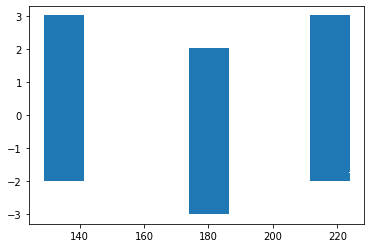

In [10]:
pl.plot(rand['RANDOM_RA'], rand['RANDOM_DEC'], marker=',', lw=0.0)

In [11]:
sorted(rand.meta)

['AREA',
 'COLLATE',
 'D80LIMS',
 'D81LIMS',
 'D82LIMS',
 'D83LIMS',
 'D84LIMS',
 'D85LIMS',
 'D86LIMS',
 'D87LIMS',
 'D88LIMS',
 'DDP1ZLIMS_NGAL',
 'DDP1_DENS',
 'DDP1_FULL8FRAC',
 'DDP1_NGAL',
 'DDP1_VZ',
 'DDP1_ZMAX',
 'DDP1_ZMIN',
 'DDP1_d0_TIERMEDd8',
 'DDP1_d0_VOLFRAC',
 'DDP1_d0_ZEROPOINT_TIERMEDd8',
 'DDP1_d0_ZEROPOINT_VOLFRAC',
 'DDP1_d1_TIERMEDd8',
 'DDP1_d1_VOLFRAC',
 'DDP1_d1_ZEROPOINT_TIERMEDd8',
 'DDP1_d1_ZEROPOINT_VOLFRAC',
 'DDP1_d2_TIERMEDd8',
 'DDP1_d2_VOLFRAC',
 'DDP1_d2_ZEROPOINT_TIERMEDd8',
 'DDP1_d2_ZEROPOINT_VOLFRAC',
 'DDP1_d3_TIERMEDd8',
 'DDP1_d3_VOLFRAC',
 'DDP1_d3_ZEROPOINT_TIERMEDd8',
 'DDP1_d3_ZEROPOINT_VOLFRAC',
 'DDP1_d4_TIERMEDd8',
 'DDP1_d4_VOLFRAC',
 'DDP1_d4_ZEROPOINT_TIERMEDd8',
 'DDP1_d4_ZEROPOINT_VOLFRAC',
 'DDP1_d5_TIERMEDd8',
 'DDP1_d5_VOLFRAC',
 'DDP1_d5_ZEROPOINT_TIERMEDd8',
 'DDP1_d5_ZEROPOINT_VOLFRAC',
 'DDP1_d6_TIERMEDd8',
 'DDP1_d6_VOLFRAC',
 'DDP1_d6_ZEROPOINT_TIERMEDd8',
 'DDP1_d6_ZEROPOINT_VOLFRAC',
 'DDP1_d7_TIERMEDd8',
 'DDP1_d7_VOLFR

In [12]:
cmap     = plt.cm.tab20c

cmaplist = [cmap(i) for i in range(cmap.N)]

cmap     = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds   = np.linspace(0, 9, 10)
norm     = mpl.colors.BoundaryNorm(bounds, cmap.N)

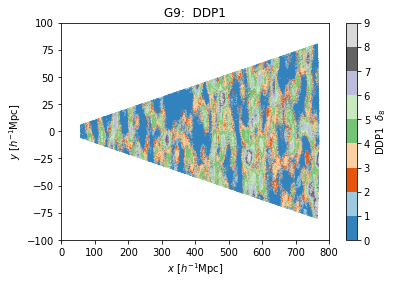

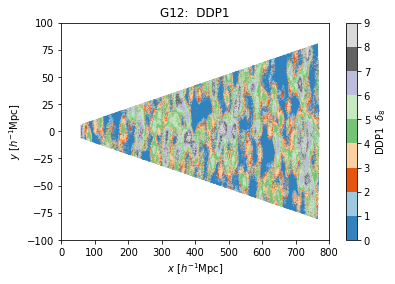

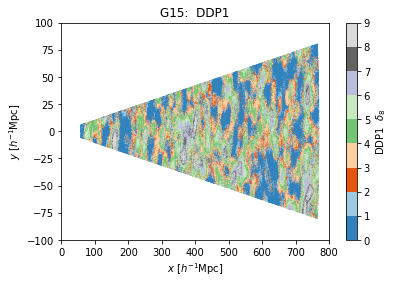

In [13]:
for field in ['G9', 'G12', 'G15']:
    pos       = np.c_[rand['ROTCARTESIAN_X'], rand['ROTCARTESIAN_Y'], rand['ROTCARTESIAN_Z']]    
    isin      = (rand['FIELD'] == field)
        
    fills     = rand['DDP1_DELTA8_TIER'].data[isin]
    pos_slice = pos[isin]

    fills     = fills[np.abs(pos_slice[:,2]) < 5.]
    pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
      
    plt.scatter(pos_slice[:,0],\
                pos_slice[:,1],\
                c=fills,\
                marker='.',\
                lw=0.0,\
                s=2,\
                cmap=cmap,\
                norm=norm)
    
    pl.xlabel('$x$ [$h^{-1}$Mpc]')
    pl.ylabel('$y$ [$h^{-1}$Mpc]')

    pl.xlim(0.,  800.)
    pl.ylim(-100., 100.)
    
    pl.colorbar(label='DDP1  $\delta_8$')
    
    plt.title('{}:  DDP1'.format(field))
        
    pl.show()

In [14]:
colors     = plt.rcParams['axes.prop_cycle'].by_key()['color']

Unique tiers: [0 1 2 3 4 5 6 7 8]
DDP1 randoms: 0.038106 < z < 0.270272
IN_D8LUMFN 0.8978055190417719

DDP1_d0_VOLFRAC OF 0.269057 added.
DDP1_d0_TIERMED d8 OF -0.896247 added.
DDP1_d0_ZEROPOINT_VOLFRAC OF 0.2126700361 added.
DDP1_d0_ZEROPOINT_TIERMED d8 OF -0.852326 added.

DDP1_d1_VOLFRAC OF 0.101673 added.
DDP1_d1_TIERMED d8 OF -0.656364 added.
DDP1_d1_ZEROPOINT_VOLFRAC OF 0.1106494050 added.
DDP1_d1_ZEROPOINT_TIERMED d8 OF -0.655514 added.

DDP1_d2_VOLFRAC OF 0.085155 added.
DDP1_d2_TIERMED d8 OF -0.500331 added.
DDP1_d2_ZEROPOINT_VOLFRAC OF 0.0913326480 added.
DDP1_d2_ZEROPOINT_TIERMED d8 OF -0.500405 added.

DDP1_d3_VOLFRAC OF 0.191262 added.
DDP1_d3_TIERMED d8 OF -0.214343 added.
DDP1_d3_ZEROPOINT_VOLFRAC OF 0.2053791838 added.
DDP1_d3_ZEROPOINT_TIERMED d8 OF -0.21329 added.

DDP1_d4_VOLFRAC OF 0.173198 added.
DDP1_d4_TIERMED d8 OF 0.334861 added.
DDP1_d4_ZEROPOINT_VOLFRAC OF 0.1858818484 added.
DDP1_d4_ZEROPOINT_TIERMED d8 OF 0.334413 added.

DDP1_d5_VOLFRAC OF 0.107214 added.


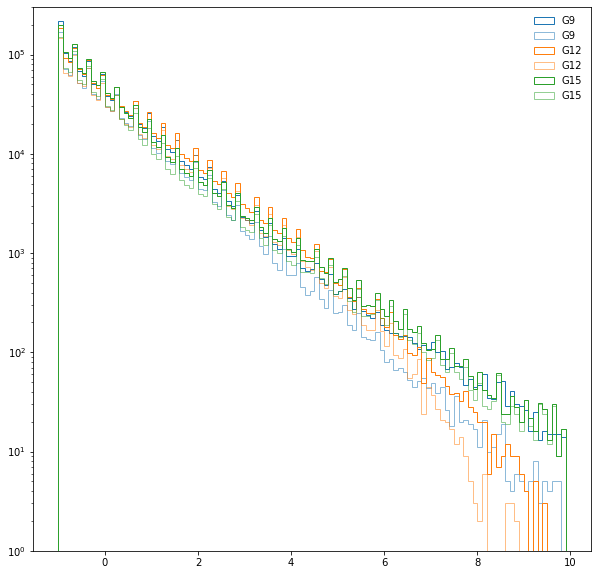

In [15]:
fieldrands = {}

fig, ax  = plt.subplots(1, 1, figsize=(10,10))

for i, field in enumerate(['G9', 'G12', 'G15']):
    isin      = (rand['FIELD'] == field)
    fills     = rand['DDP1_DELTA8'].data[isin]
    
    ax.hist(fills, bins=np.arange(-1., 10., 0.1), histtype='step', label=field, color=colors[i])

    isin      = (rand['FIELD'] == field) & (rand['FILLFACTOR'] > 0.8)
    fills     = rand['DDP1_DELTA8'].data[isin]
    
    ax.hist(fills, bins=np.arange(-1., 10., 0.1), histtype='step', label=field, alpha=0.5, color=colors[i])

    fieldrands[field] = volfracs(rand[isin])
    
ax.set_ylim(1., 3.e5)
ax.set_yscale('log')

pl.legend(frameon=False)

In [16]:
def dfilter(mydict):
    return  {k: v for k, v in mydict.items() if k.startswith('DDP1_d')}

In [17]:
hdrs = [dfilter(fieldrands[ff].meta) for ff in fields]

print('{}\t{}\t\t{}\t\t{}'.format(''.ljust(25), 'G9', 'G12', 'G15'))
print()

for key in hdrs[0].keys():    
    print('{}\t{}\t{}\t{}'.format(key.ljust(25), hdrs[0][key], hdrs[1][key], hdrs[2][key]))

                         	G9		G12		G15

DDP1_d0_VOLFRAC          	0.269057	0.245402	0.261130
DDP1_d0_TIERMEDd8        	-0.896247	-0.893022	-0.889091
DDP1_d0_ZEROPOINT_VOLFRAC	0.212670	0.190178	0.200470
DDP1_d0_ZEROPOINT_TIERMEDd8	-0.852326	-0.851502	-0.847719
DDP1_d1_VOLFRAC          	0.101673	0.099834	0.110440
DDP1_d1_TIERMEDd8        	-0.656364	-0.655798	-0.655567
DDP1_d1_ZEROPOINT_VOLFRAC	0.110649	0.107772	0.118177
DDP1_d1_ZEROPOINT_TIERMEDd8	-0.655514	-0.655659	-0.6559
DDP1_d2_VOLFRAC          	0.085155	0.086236	0.092954
DDP1_d2_TIERMEDd8        	-0.500331	-0.499920	-0.500715
DDP1_d2_ZEROPOINT_VOLFRAC	0.091333	0.091785	0.101190
DDP1_d2_ZEROPOINT_TIERMEDd8	-0.500405	-0.499906	-0.500995
DDP1_d3_VOLFRAC          	0.191262	0.184483	0.199966
DDP1_d3_TIERMEDd8        	-0.214343	-0.216770	-0.214382
DDP1_d3_ZEROPOINT_VOLFRAC	0.205379	0.199857	0.216196
DDP1_d3_ZEROPOINT_TIERMEDd8	-0.21329	-0.217061	-0.214664
DDP1_d4_VOLFRAC          	0.173198	0.170923	0.166371
DDP1_d4_TIERMEDd8        	0.33

# Done.